# Day 2 特徵工程
* 建議可以先「變更執行階段類型」為「TPU」或「GPU」，利於後段機器學習模型訓練

## 套件

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

## 一、資料集
* 請上傳你的資料集並更改為你的檔名

In [2]:
df = pd.read_csv('knn_imputed_data.csv')
df

,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,0.0,-1.8653,3.479344,47.8891,44.044274,9.0,10.0,39.0,21.0,...,0.862046,0.116831,0.560654,0.379450,0.268039,20.706840,52.049186,91.644726,0.793068,1.208143
1,0.0,0.0,-7.2263,52.219412,137.7680,88.208099,0.0,0.0,87.0,44.0,...,0.883822,0.065994,0.572409,0.487711,0.434117,42.761478,193.812432,465.446927,0.825733,1.494237
2,0.0,0.0,-2.1004,4.411680,67.0727,55.758204,6.0,6.0,52.0,24.0,...,0.910758,0.057143,0.494202,0.319559,0.386393,29.370226,71.693573,143.387359,0.866137,1.200154
3,0.0,0.0,-0.5179,0.268220,52.6108,46.640239,6.0,6.0,43.0,20.0,...,0.908190,0.048952,0.533958,0.387559,0.470449,24.128665,49.765298,100.659835,0.862285,1.391967
4,0.0,1.0,0.5703,0.325242,37.1534,45.496309,12.0,12.0,36.0,23.0,...,0.629985,0.333300,0.474489,0.401925,0.374420,15.580870,59.559927,104.301091,0.444977,1.250833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1.0,0.0,-0.9977,0.995405,88.4810,74.525376,11.0,11.0,66.0,34.0,...,0.763998,0.177223,0.492601,0.416635,0.370680,21.045847,81.565605,167.109297,0.645997,1.279915
936,1.0,0.0,-0.9977,0.995405,88.4810,74.525376,11.0,11.0,66.0,34.0,...,0.763998,0.177223,0.492601,0.416635,0.370680,21.045847,81.565605,167.109297,0.645997,1.279915
937,1.0,0.0,-0.9977,0.995405,88.4810,74.525376,11.0,11.0,66.0,34.0,...,0.763998,0.177223,0.492601,0.416635,0.370680,21.045847,81.565605,167.109297,0.645997,1.279915
938,1.0,0.0,-0.9977,0.995405,88.4810,74.525376,11.0,11.0,66.0,34.0,...,0.763998,0.177223,0.492601,0.416635,0.370680,21.045847,81.565605,167.109297,0.645997,1.279915


## 刪除欄位

In [ ]:
# df = df.drop(columns=['ID', 'name', 'smiles'])
# df

## 填補資料/刪除資料
* 請同學直接使用上週填補資料的結果
* 本範例直接刪除空值的資料（浪費！）

In [4]:
# df = df.dropna()
# df.describe()

,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
count,734.000000,734.000000,734.000000,7.340000e+02,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,...,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,0.362398,0.232970,-0.546345,2.287263e+00,49.447704,47.392145,8.054496,8.297003,41.178474,21.719346,...,0.702627,0.218700,0.539130,0.440790,0.392853,16.020170,55.189468,118.044112,0.577036,1.372773
std,0.481021,0.585363,1.411199,5.986129e+00,25.558618,16.620156,5.069748,5.322255,15.452679,7.107265,...,0.180977,0.094124,0.369979,0.074599,0.239596,9.385853,47.769028,124.197258,0.248544,0.581040
min,0.000000,0.000000,-9.309100,4.900000e-07,7.219300,8.231172,0.000000,0.000000,9.000000,4.000000,...,-3.013569,-0.210215,0.358231,0.009991,0.077354,-2.422319,-72.221189,-83.777196,0.130583,0.953762
25%,0.000000,0.000000,-1.373350,1.892061e-01,33.365450,35.851016,6.000000,6.000000,31.000000,17.000000,...,0.622469,0.147063,0.484164,0.386366,0.337687,11.443047,29.228773,55.013384,0.444995,1.261223
50%,0.000000,0.000000,-0.499250,8.149663e-01,45.039150,47.141256,6.000000,6.000000,40.000000,22.000000,...,0.718708,0.207470,0.521801,0.444935,0.389592,14.390496,45.296047,92.071170,0.579346,1.345641
75%,1.000000,0.000000,0.298575,2.343048e+00,59.713300,57.441902,12.000000,12.000000,50.000000,26.000000,...,0.791495,0.286961,0.562239,0.492481,0.433775,18.413714,67.576389,142.422262,0.688354,1.419913
max,1.000000,4.000000,5.546300,8.665934e+01,207.953800,133.058717,24.000000,25.000000,127.000000,58.000000,...,1.635949,0.456552,10.124937,0.839105,5.436597,178.093767,551.567752,1634.182056,5.599021,15.571526


#本範例以下步驟變更前請在此重置變數
* df 原始資料
* data 特徵改變後的資料（隨步驟變化）
    * 只有特徵，沒有標註(output)
* selected_features 目前的特徵（特徵選擇後會減少）

In [41]:
data = df
data = data.drop(columns=['output'])
selected_features = data.columns

## 二、特徵縮放
* 建議使用特徵縮放的方法
    * 基於距離的演算法：例如kNN、k-Means clustering、SVM、PCA等
* 以下兩種方法擇一即可

### 2.1 標準化 Standardization (Z-score Normalization)
#### 將特徵轉為常態分佈的z值（M=0, SD=1）
* 適合用於
    * 假設資料為常態分佈的演算法：例如線性回歸
    * 假設資料中心為０的演算法：例如PCA

In [43]:
#標準化 Standardization (Z-score Normalization)
scaler = StandardScaler()
data = scaler.fit_transform(data)
pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640
count,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,...,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02
mean,5.669224e-17,-6.141659e-17,2.267690e-17,-9.070758e-17,-7.369991e-17,4.913327e-17,3.968457e-17,-4.535379e-17,-2.220446e-16,-3.080278e-16,...,1.409747e-15,-4.743251e-16,-1.133845e-17,4.308610e-16,-3.779483e-17,-1.814152e-16,-2.929099e-16,-9.637681e-17,-9.448707e-18,2.834612e-17
std,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,...,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00
min,-3.912040e-01,-8.049075e+00,-3.116199e-01,-1.439941e+00,-1.993867e+00,-1.536696e+00,-1.508328e+00,-1.771108e+00,-2.073871e+00,-1.833821e+00,...,-2.288042e+01,-4.914255e+00,-5.396496e-01,-6.304618e+00,-1.486098e+00,-2.114503e+00,-2.351663e+00,-1.438899e+00,-2.015624e+00,-8.039508e-01
25%,-3.912040e-01,-5.244475e-01,-2.874145e-01,-6.318899e-01,-6.542241e-01,-4.117005e-01,-4.334013e-01,-6.696422e-01,-6.195312e-01,-6.678588e-01,...,-4.158073e-01,-6.926143e-01,-1.413546e-01,-6.797802e-01,-2.096781e-01,-5.561958e-01,-5.563119e-01,-5.072348e-01,-4.911656e-01,-1.811264e-01
50%,-3.912040e-01,1.367828e-02,-2.074038e-01,-2.259365e-01,-1.210191e-01,-4.117005e-01,-4.334013e-01,-1.428543e-01,-2.040055e-01,-1.681608e-01,...,8.740845e-02,-1.104305e-01,-4.008379e-02,3.199026e-03,-7.579472e-03,-1.886335e-01,-2.478227e-01,-2.391673e-01,3.272279e-02,-4.556569e-02
75%,-3.912040e-01,5.663140e-01,-3.462355e-02,3.460853e-01,4.421404e-01,7.132951e-01,6.415253e-01,4.318234e-01,4.192832e-01,4.981032e-01,...,4.557758e-01,6.205830e-01,6.712616e-02,6.561886e-01,1.686870e-01,3.588258e-01,2.602561e-01,1.642394e-01,4.138919e-01,8.816878e-02
max,1.239947e+01,5.948012e+00,1.940784e+01,6.149203e+00,5.939529e+00,4.088282e+00,4.582923e+00,6.370160e+00,5.925000e+00,6.327913e+00,...,5.710835e+00,2.777433e+00,2.930800e+01,5.861489e+00,2.377579e+01,1.736491e+01,8.399316e+00,9.538679e+00,2.247596e+01,2.762873e+01


### 2.2 最大最小縮放 Min-Max Scaling
#### 將特徵縮放到 [0, 1] 之間
* 適合用於不限制常態分佈的演算法

In [42]:
#最大最小縮放 Min-Max Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.030585,0.575054,0.015803,0.189737,0.251326,0.273191,0.247622,0.217547,0.259271,0.224685,...,0.800259,0.638905,0.018080,0.518212,0.058828,0.108551,0.218739,0.131076,0.082299,0.028276
std,0.078224,0.071481,0.050738,0.131837,0.126117,0.177873,0.164257,0.122896,0.125084,0.122588,...,0.034994,0.130080,0.033521,0.082239,0.039606,0.051364,0.093064,0.091143,0.040852,0.035190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.537585,0.001227,0.106475,0.168861,0.200000,0.176471,0.135294,0.181818,0.142857,...,0.785716,0.548857,0.013344,0.462337,0.050528,0.079998,0.166994,0.084870,0.062244,0.021905
50%,0.000000,0.576031,0.005285,0.159966,0.236071,0.200000,0.176471,0.200000,0.233766,0.204082,...,0.803317,0.624547,0.016737,0.518475,0.058528,0.098867,0.195688,0.109289,0.083635,0.026673
75%,0.000000,0.615513,0.014047,0.235340,0.307057,0.400000,0.352941,0.270588,0.311688,0.285714,...,0.816200,0.719587,0.020329,0.572147,0.065505,0.126971,0.242947,0.146038,0.099198,0.031377
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 三、特徵選擇

### 3.1 相關係數法

#### 假設：與標註低相關的特徵對模型可能幫助不大
* 本範例請設定適合的相關係數閾值 r_threshold
    * 提醒：重新執行前記得先重置變數才不會出錯
* 本範例使用pandas的相關係數計算，而非sklearn

#### 挑戰：相關係數閾值應該設定多少？

In [17]:
data = pd.DataFrame(data, columns=selected_features)
df_corr = pd.DataFrame({'Feature':selected_features, 'Coorelation':data.corrwith(df['output']).abs()})
df_corr.describe()

,Coorelation
count,1641.000000
mean,0.124750
std,0.087755
min,0.000185
25%,0.050253
50%,0.118572
75%,0.181265
max,0.423425


In [18]:
#相關分析（只看與output相關的部分）
correlations = data.corrwith(df['output'])

#特徵選擇
r_threshold = 0.05  #請選擇適當的閾值: 25%
selected_features = correlations[correlations.abs() > r_threshold].index
data = df[selected_features]

print(selected_features)
pd.DataFrame({'Feature':selected_features, 'Coorelation':data.corrwith(df['output'])})

Index(['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond',
       'nAtom', 'nHeavyAtom', 'nH',
       ...
       'P1s', 'P2s', 'E1s', 'E2s', 'E3s', 'Ts', 'As', 'Vs', 'Ks', 'Ds'],
      dtype='object', length=1231)


,Feature,Coorelation
nAcid,nAcid,-0.238785
ALogP,ALogP,0.131502
ALogp2,ALogp2,-0.137286
AMR,AMR,-0.202792
apol,apol,-0.118218
...,...,...
Ts,Ts,-0.188619
As,As,-0.166478
Vs,Vs,-0.162850
Ks,Ks,-0.204319


In [ ]:
X = data
y = df['output']

### 3.2 決策樹法
#### 利用建立決策樹時的Gini不純度指標的總減少量代表特徵重要性
* 決策樹對於資料單位較不敏感，不一定需要特徵縮放

In [ ]:
#建立決策樹
tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = pd.DataFrame({'features':selected_features, 'importance':tree.feature_importances_}).sort_values('importance', ascending=False)
importances.head(10)

,features,importance
1410,TopoPSA,0.200301
903,minHBa,0.095009
613,ASP-0,0.067204
556,SpMax1_Bhs,0.045470
1539,WPSA-1,0.045222
788,SHBint4,0.032914
387,VE1_Dzm,0.031627
220,AATSC1e,0.028659
459,BCUTw-1l,0.028210
265,MATS3m,0.027866


In [ ]:
#從決策樹的信息熵來選擇
sfm = SelectFromModel(tree, threshold=.05)
data = sfm.fit_transform(data, df['output'])
data

array([[  0.68557032,   2.01151927, 101.88      ],
       [  0.74131985,   2.82332503, 321.17      ],
       [  0.75468832,   2.75685945,  87.66      ],
       ...,
       [  0.69713682,  -9.39194685,  69.08      ],
       [  0.70710678,   3.22222222,  24.06      ],
       [  0.74789096,   1.92625154,  40.62      ]])

### 3.3 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
rf_model = RandomForestClassifier()
rf_model.fit(X,y) #X:就是年亨老師的data y:output
print(rf_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### 3.4 DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
 
dt_model = DecisionTreeClassifier()
dt_model.fit(X,y)
 
print(dt_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### 3.5 ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## 四、特徵縮減


### 主成分分析 Principal Components Analysis (PCA)

In [44]:
#創建主成份分析
#請指定主成分個數（須小於特徵數量）
com_number = 20
pca = PCA(n_components=com_number)

pca_result = pca.fit_transform(data)
pca_result

array([[-4.89701588, -1.5759953 ,  5.07358974, ..., -1.11451396,
         3.08343491,  5.02231139],
       [57.36344304, 35.81092563,  4.92846465, ...,  3.68909917,
        -2.18270139, -3.52006101],
       [ 2.47142656,  3.81413943, -4.74607354, ...,  0.63488299,
        -1.55540085, -1.79167658],
       ...,
       [16.54638189, -5.53368912,  4.17623056, ...,  3.33872459,
        -2.12877053,  0.62756787],
       [16.54638189, -5.53368912,  4.17623056, ...,  3.33872459,
        -2.12877053,  0.62756787],
       [16.54638189, -5.53368912,  4.17623056, ...,  3.33872459,
        -2.12877053,  0.62756787]])

In [45]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained variance ratio:", explained_variance)
print("Cumulative variance ratio:", cumulative_variance)


Explained variance ratio: [0.28534682 0.07696292 0.0665289  0.03442299 0.02991065 0.02567771
 0.02164218 0.01810554 0.01606758 0.01518704 0.01435049 0.01329001
 0.01181756 0.01102811 0.01006313 0.00978934 0.00948009 0.00894884
 0.00838684 0.00832488]
Cumulative variance ratio: [0.28534682 0.36230973 0.42883863 0.46326163 0.49317228 0.51884999
 0.54049217 0.55859771 0.57466529 0.58985233 0.60420282 0.61749283
 0.62931039 0.6403385  0.65040163 0.66019097 0.66967106 0.6786199
 0.68700674 0.69533162]


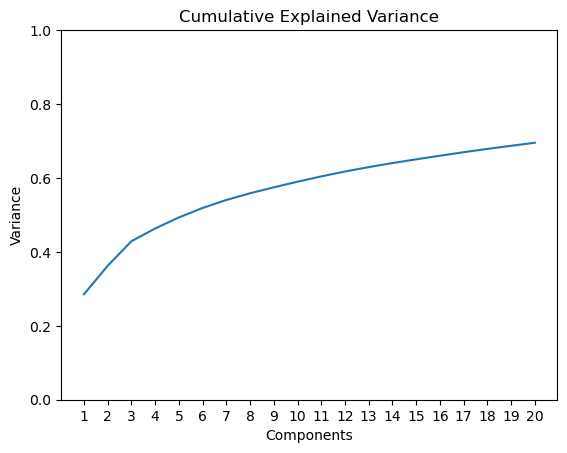

In [46]:
import matplotlib.pyplot as plt

plt.plot(range(com_number), cumulative_variance)

plt.title('Cumulative Explained Variance')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.ylim(0, 1)
plt.xticks(range(com_number), range(1, com_number+1))
plt.show()

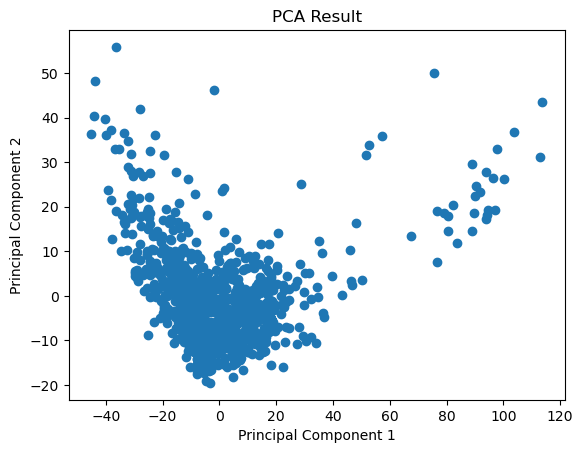

In [47]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

# 分類模型

## 支持向量機 Support Vector Machine (SVM)

In [48]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

### 使用原始資料

In [54]:
# 定義參數範圍
param_grid = {'C': [0.1, 1, 5, 10, 15], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 1]}  

#分割訓練集與測試集：使用data（不降維）
x_train, x_test, y_train, y_test = train_test_split(data, df['output'], test_size=0.2, random_state=55)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)


# 創建SVM模型
svm_classifier = svm.SVC(kernel='rbf')

# 使用Grid Search來進行交叉驗證
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# 最佳的Gamma值和C值
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']
print(best_gamma, best_C)

# 使用最佳的Gamma值和C值創建最終的SVM模型
final_svm_classifier = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)
final_svm_classifier.fit(x_train, y_train)
y_pred = final_svm_classifier.predict(x_test)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)


資料量: (752, 1641) (188, 1641) 752 188
0.001 10
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       113
         1.0       0.86      0.79      0.82        75

    accuracy                           0.86       188
   macro avg       0.86      0.85      0.85       188
weighted avg       0.86      0.86      0.86       188



In [55]:
#分割訓練集與測試集：使用data（不降維）
x_train, x_test, y_train, y_test = train_test_split(data, df['output'], test_size=0.2, random_state=55)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)

#創建Support Vector Classifier
model = svm.SVC(kernel='rbf', C=10, gamma=0.001)

#模型訓練
model.fit(x_train, y_train)

#預測資料
y_pred = model.predict(x_test)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

資料量: (752, 1641) (188, 1641) 752 188
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       113
         1.0       0.86      0.79      0.82        75

    accuracy                           0.86       188
   macro avg       0.86      0.85      0.85       188
weighted avg       0.86      0.86      0.86       188



### 使用PCA

In [56]:
#分割訓練集與測試集：使用pca_result
x_train, x_test, y_train, y_test = train_test_split(pca_result, df['output'], test_size=0.2, random_state=42)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)

#創建Support Vector Classifier
model = svm.SVC(kernel='rbf')

#模型訓練
model.fit(x_train, y_train)

#預測資料
y_pred = model.predict(x_test)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

資料量: (752, 20) (188, 20) 752 188
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       116
         1.0       0.88      0.69      0.78        72

    accuracy                           0.85       188
   macro avg       0.85      0.82      0.83       188
weighted avg       0.85      0.85      0.84       188

